PIGS ANALYSIS NOTEBOOK  
Patrick M. Donnelly  
University of Washington  
August 6th, 2018  

In [1]:
# import necessary databases and libraries
import pycurl,json,requests,sys,os
import pandas as pd
import numpy as np
# existing redcap API stipulates StringIO, but pycurl now works with BytesIO
from io import BytesIO

In [2]:
# get api token
# if you need an access token, consult the RedCap API page
home = os.path.expanduser('~')
with open (home+"/Desktop/redcap_apitoken_repo.txt", "r") as myfile:
    token=myfile.read().split()

In [3]:
# say which report you want
# report 27719 is the report in the screening database called "pigs_data"
report = {
    'token': token,
    'content': 'report',
    'format': 'csv',
    'report_id': '27719',
    'rawOrLabel': 'raw',
    'rawOrLabelHeaders': 'raw',
    'exportCheckboxLabel': 'false',
    'returnFormat': 'csv'
}

In [4]:
# specify API address
redcap_path = 'https://redcap.iths.org/api/'
# use requests module to pull data from database using api token
# and convert to csv
pull_pigs = requests.post(redcap_path, data=report)
report_filename =os.path.join(home+'/Downloads/pigs_data.csv')
with open(report_filename, 'w') as report_file:
        report_file.write(pull_pigs.text)
pigs_data = pd.read_csv(report_filename)
visit1 = pigs_data[pigs_data['study_name'] == 41]
visit2 = pigs_data[pigs_data['study_name'] == 42]

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from scipy.stats import linregress

In [6]:
pigs_data['short_first_time'] = np.nan
pigs_data['short_first_acc']  = np.nan
pigs_data['short_first_rate']  = np.nan
pigs_data['long_first_time']  = np.nan
pigs_data['long_first_acc']  = np.nan
pigs_data['long_first_rate']  = np.nan
pigs_data['short_second_time']  = np.nan
pigs_data['short_second_acc'] = np.nan
pigs_data['short_second_rate'] = np.nan
pigs_data['long_second_time'] = np.nan
pigs_data['long_second_acc'] = np.nan
pigs_data['long_second_rate'] = np.nan

for ii in range(0, len(pigs_data['record_id'])):
    if pigs_data['pigs_group'][ii] == 'A1' or 'B1':
        pigs_data.loc[ii,'short_first_time'] = np.mean([pigs_data['pigs_p1_r1_time'][ii], pigs_data['pigs_p2_r1_time'][ii]])
        pigs_data.loc[ii,'short_first_acc'] = np.mean([pigs_data['pigs_p1_r1_acc'][ii], pigs_data['pigs_p2_r1_acc'][ii]])
        pigs_data.loc[ii,'short_first_rate'] = np.mean([pigs_data['pigs_p1_r1_rate'][ii], pigs_data['pigs_p2_r1_rate'][ii]])
        pigs_data.loc[ii,'long_first_time'] = np.mean([pigs_data['pigs_p3_r1_time'][ii], pigs_data['pigs_p4_r1_time'][ii]])
        pigs_data.loc[ii,'long_first_acc'] = np.mean([pigs_data['pigs_p3_r1_acc'][ii], pigs_data['pigs_p4_r1_acc'][ii]])
        pigs_data.loc[ii,'long_first_rate'] = np.mean([pigs_data['pigs_p3_r1_rate'][ii], pigs_data['pigs_p4_r1_rate'][ii]])
        
        pigs_data.loc[ii,'short_second_time'] = np.mean([pigs_data['pigs_p1_r2_time'][ii], pigs_data['pigs_p2_r2_time'][ii]])
        pigs_data.loc[ii,'short_second_acc'] = np.mean([pigs_data['pigs_p1_r2_acc'][ii], pigs_data['pigs_p2_r2_acc'][ii]])
        pigs_data.loc[ii,'short_second_rate'] = np.mean([pigs_data['pigs_p1_r2_rate'][ii], pigs_data['pigs_p2_r2_rate'][ii]])
        pigs_data.loc[ii,'long_second_time'] = np.mean([pigs_data['pigs_p3_r2_time'][ii], pigs_data['pigs_p4_r2_time'][ii]])
        pigs_data.loc[ii,'long_second_acc'] = np.mean([pigs_data['pigs_p3_r2_acc'][ii], pigs_data['pigs_p4_r2_acc'][ii]])
        pigs_data.loc[ii,'long_second_rate'] = np.mean([pigs_data['pigs_p3_r2_rate'][ii], pigs_data['pigs_p4_r2_rate'][ii]])


In [7]:
pigs_data['word_time'] = np.nan
pigs_data['word_acc'] = np.nan
pigs_data['word_rate'] = np.nan
pigs_data['pseudo_time'] = np.nan
pigs_data['pseudo_acc'] = np.nan
pigs_data['pseudo_rate'] = np.nan

for ii in range(0, len(pigs_data['record_id'])):
    pigs_data.loc[ii, 'word_time'] = np.mean([pigs_data['pigs_word1_time'][ii], pigs_data['pigs_word2_time'][ii]])
    pigs_data.loc[ii, 'word_acc'] = np.mean([pigs_data['pigs_word1_acc'][ii], pigs_data['pigs_word2_acc'][ii]])
    pigs_data.loc[ii, 'word_rate'] = np.mean([pigs_data['pigs_word1_rate'][ii], pigs_data['pigs_word2_rate'][ii]])
    pigs_data.loc[ii, 'pseudo_time'] = np.mean([pigs_data['pigs_pseudo1_time'][ii], pigs_data['pigs_pseudo2_time'][ii]])
    pigs_data.loc[ii, 'pseudo_acc'] = np.mean([pigs_data['pigs_pseudo1_acc'][ii], pigs_data['pigs_pseudo2_acc'][ii]])
    pigs_data.loc[ii, 'pseudo_rate'] = np.mean([pigs_data['pigs_pseudo1_rate'][ii], pigs_data['pigs_pseudo2_rate'][ii]])

for jj in range(1, len(pigs_data['record_id']), 2):
    pigs_data.loc[jj, 'word_acc_diff'] = pigs_data['word_acc'][pigs_data['study_name'] == 42][jj] - pigs_data['word_acc'][pigs_data['study_name'] == 41][jj-1]
    pigs_data.loc[jj, 'pseudo_acc_diff'] = pigs_data['pseudo_acc'][pigs_data['study_name'] == 42][jj] - pigs_data['pseudo_acc'][pigs_data['study_name'] == 41][jj-1]

In [8]:
passage_data = pigs_data[['pigs_casecontrol', 'study_name', 'short_first_time', 
                          'short_first_acc', 'short_first_rate', 'long_first_time', 
                          'long_first_acc','long_first_rate', 'short_second_time', 
                          'short_second_acc', 'short_second_rate', 
                          'long_second_time', 'long_second_acc', 'long_second_rate']]
wordlist_data = pigs_data[['pigs_casecontrol', 'study_name','word_time', 'word_acc', 'word_rate',
                           'pseudo_time', 'pseudo_acc', 'pseudo_rate']]
passage_accuracy = pigs_data[['pigs_casecontrol', 'study_name','short_first_acc',
                          'long_first_acc','short_second_acc', 'long_second_acc']]
passage_rate = pigs_data[['pigs_casecontrol', 'study_name', 'short_first_rate', 
                          'long_first_rate', 'short_second_rate', 'long_second_rate']]
wordlist_acc_data = pigs_data[['pigs_casecontrol', 'study_name','word_acc','pseudo_acc']]
wordlist_acc_diff_data = pigs_data[['pigs_casecontrol', 'word_acc_diff', 'pseudo_acc_diff']]
wordlist_rate_data = pigs_data[['pigs_casecontrol', 'study_name', 'word_rate','pseudo_rate']]

In [9]:
acc_grouped = passage_accuracy.groupby(['pigs_casecontrol', 'study_name']).mean()

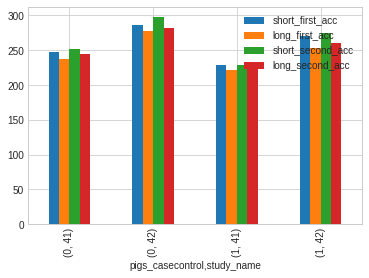

In [21]:
acc_grouped.plot(kind='bar',style='seaborn-whitegrid')

In [11]:
rate_grouped = passage_rate.groupby(['pigs_casecontrol', 'study_name']).mean()

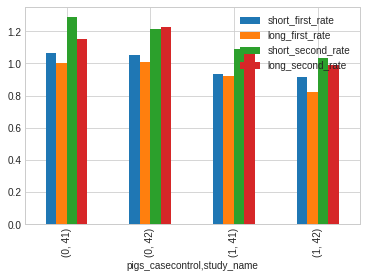

In [12]:
rate_grouped.plot(kind='bar')

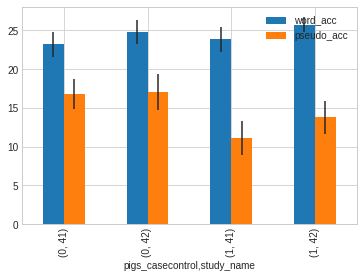

In [23]:
wordlist_acc_grouped = wordlist_acc_data.groupby(['pigs_casecontrol', 'study_name']).mean()
wl_acc_grpd_error = wordlist_acc_data.groupby(['pigs_casecontrol', 'study_name']).sem()
wordlist_acc_grouped.plot(kind='bar', yerr=wl_acc_grpd_error)

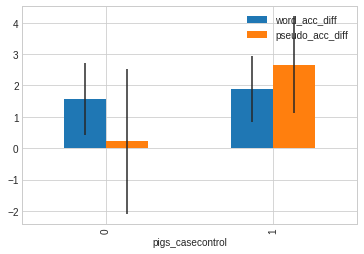

In [64]:
wordlist_acc_diff_grouped = wordlist_acc_diff_data.groupby(['pigs_casecontrol']).mean()
wl_acc_diff_grpd_error = wordlist_acc_diff_data.groupby(['pigs_casecontrol']).sem()
wordlist_acc_diff_grouped.plot(kind='bar', yerr=wl_acc_diff_grpd_error)

In [52]:
wordlist_acc_diff_data[['word_acc_diff', 'pseudo_acc_diff']].plt.bar()

AttributeError: 'DataFrame' object has no attribute 'plt'

ValueError: cannot copy sequence with size 14 to array axis with dimension 2

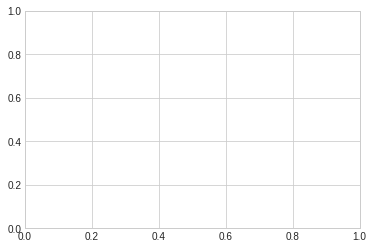

In [87]:
control_acc = wordlist_acc_diff_data[wordlist_acc_diff_data['pigs_casecontrol']==0]
pigs_acc = wordlist_acc_diff_data[wordlist_acc_diff_data['pigs_casecontrol']==1]
#plt.scatter(wordlist_acc_diff_data['pigs_casecontrol'][wordlist_acc_diff_data['pigs_casecontrol']==0],wordlist_acc_diff_data['word_acc_diff'][wordlist_acc_diff_data['pigs_casecontrol']==0])
#plt.scatter(wordlist_acc_diff_data['pigs_casecontrol'][wordlist_acc_diff_data['pigs_casecontrol']==1],wordlist_acc_diff_data['pseudo_acc_diff'][wordlist_acc_diff_data['pigs_casecontrol']==1])
plt.plot(control_acc['pigs_casecontrol'], [control_acc[['word_acc_diff','pseudo_acc_diff']]])
plt.plot(pigs_acc['pigs_casecontrol'], [pigs_acc[['word_acc_diff','pseudo_acc_diff']]])

In [56]:
wordlist_acc_diff_data['pigs_casecontrol'].unique()

array([0, 1])

In [15]:
wordlist_rate_grouped = wordlist_rate_data.groupby(['pigs_casecontrol', 'study_name']).mean()

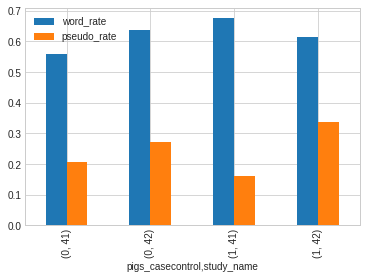

In [16]:
wordlist_rate_grouped.plot(kind='bar')